### Test with new dataset


In [ ]:
!protoc --version

libprotoc 3.12.4


protobuf==3.23

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


tensorflow-protobuf==2.14.0


In [ ]:
import pandas as pd
import csv
import numpy as np

In [ ]:
data_pengeluaran = pd.read_csv('/content/bangalore  - item (1).csv')

In [ ]:
data_pengeluaran.head()

,date,item_name,item_category,price
0,11/29/2021,tea,food,10.0
1,11/29/2021,cold coffe,food,35.0
2,11/29/2021,flat coffe,food,10.0
3,11/29/2021,biscuits,food,10.0
4,11/29/2021,medicine,medicine,500.0


In [ ]:
data_pengeluaran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1299 non-null   object 
 1   item_name       1299 non-null   object 
 2   item_category   1299 non-null   object 
 3   price           1298 non-null   float64
dtypes: float64(1), object(3)
memory usage: 40.7+ KB


In [ ]:
data_pengeluaran.describe()

,price
count,1298.000000
mean,152.362866
std,477.496281
min,4.000000
25%,20.000000
50%,40.000000
75%,138.750000
max,10314.000000


In [ ]:
data_pengeluaran.isnull().sum()

date              0
item_name         0
item_category     0
price             1
dtype: int64

In [ ]:
data_pengeluaran = data_pengeluaran.dropna()

In [ ]:
data_pengeluaran.isnull().sum()

date              0
item_name         0
item_category     0
price             0
dtype: int64

In [ ]:
data_pengeluaran.head()

,date,item_name,item_category,price
0,11/29/2021,tea,food,10.0
1,11/29/2021,cold coffe,food,35.0
2,11/29/2021,flat coffe,food,10.0
3,11/29/2021,biscuits,food,10.0
4,11/29/2021,medicine,medicine,500.0


In [ ]:
data_pengeluaran['price '] = data_pengeluaran['price '] * 186.66

In [ ]:
# data_pengeluaran['price '] = data_pengeluaran['price '].astype(int)

In [ ]:
data_pengeluaran.isnull().sum()

date              0
item_name         0
item_category     0
price             0
dtype: int64

In [ ]:
data_pengeluaran.head()

,date,item_name,item_category,price
0,11/29/2021,tea,food,1866.6
1,11/29/2021,cold coffe,food,6533.1
2,11/29/2021,flat coffe,food,1866.6
3,11/29/2021,biscuits,food,1866.6
4,11/29/2021,medicine,medicine,93330.0


In [ ]:
data_pengeluaran.to_csv("data_pengeluaran.csv", index=False)

In [ ]:
times = []
outcomes = []

with open('/content/data_pengeluaran.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step = 1
  for row in reader:
    times.append(step)
    step += 1
    outcomes.append(float(row[3]))

In [ ]:
times_step = np.array(times)
series = np.array(outcomes)

In [ ]:
series = series.astype(int)

In [ ]:
times_step[0:5]

array([1, 2, 3, 4, 5])

In [ ]:
series[0:5]

array([ 1866,  6533,  1866,  1866, 93330])

In [ ]:
data_pengeluaran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1298
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1298 non-null   object 
 1   item_name       1298 non-null   object 
 2   item_category   1298 non-null   object 
 3   price           1298 non-null   float64
dtypes: float64(1), object(3)
memory usage: 50.7+ KB


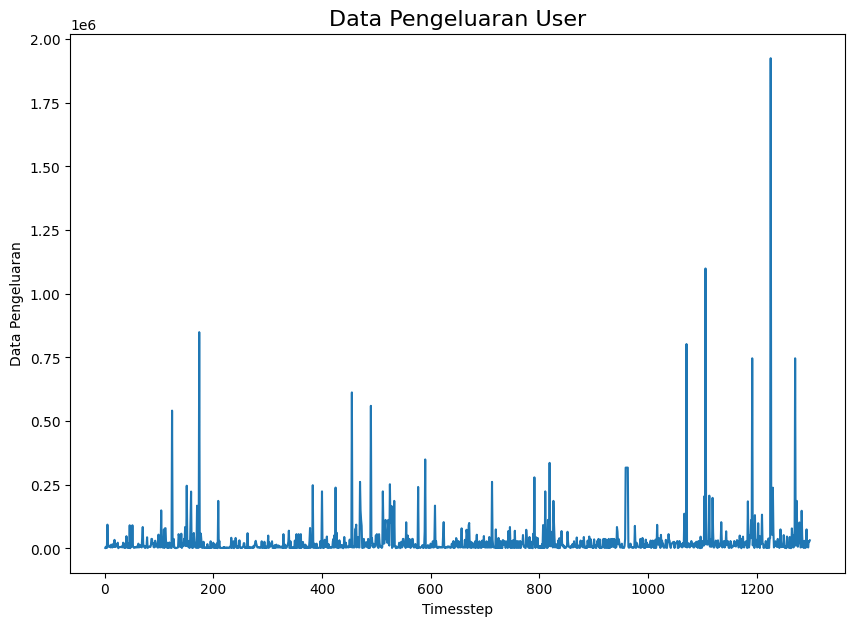

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(times, outcomes)
plt.title("Data Pengeluaran User", fontsize=16)
plt.xlabel("Timesstep")
plt.ylabel("Data Pengeluaran");

### Split data

Using: times_step and series

In [ ]:
split_size = int(0.8 * len(series)) # 80% train, 20% test

X_train, y_train = times_step[:split_size], series[:split_size]

X_test, y_test = times_step[split_size:], series[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1038, 260, 1038, 260)

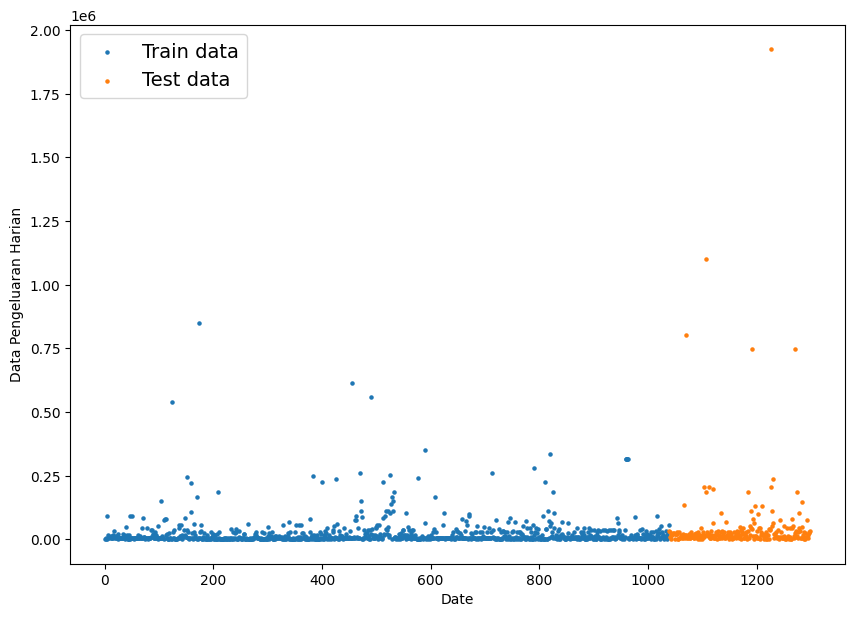

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Data Pengeluaran Harian")
plt.legend(fontsize=14)
plt.show();

### Plotting function

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Data Pengeluaran")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

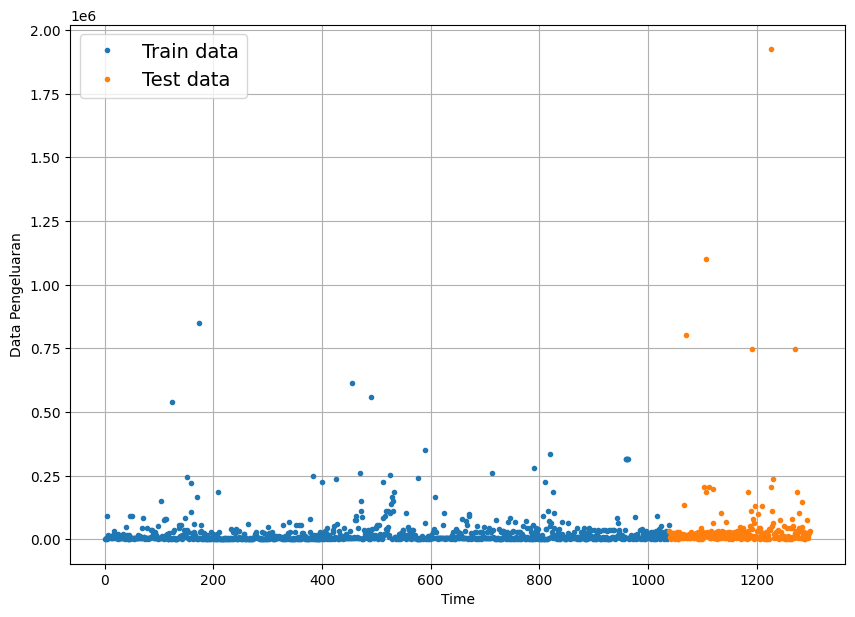

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Model 0 Nive forecast

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([34158, 28932,  8399,  1866, 13066, 19599, 20532, 24265, 20532,
        26132]),
 array([29865, 26132,  1866, 11199, 74664, 11199, 17732,  3733, 28932,
        26132]))

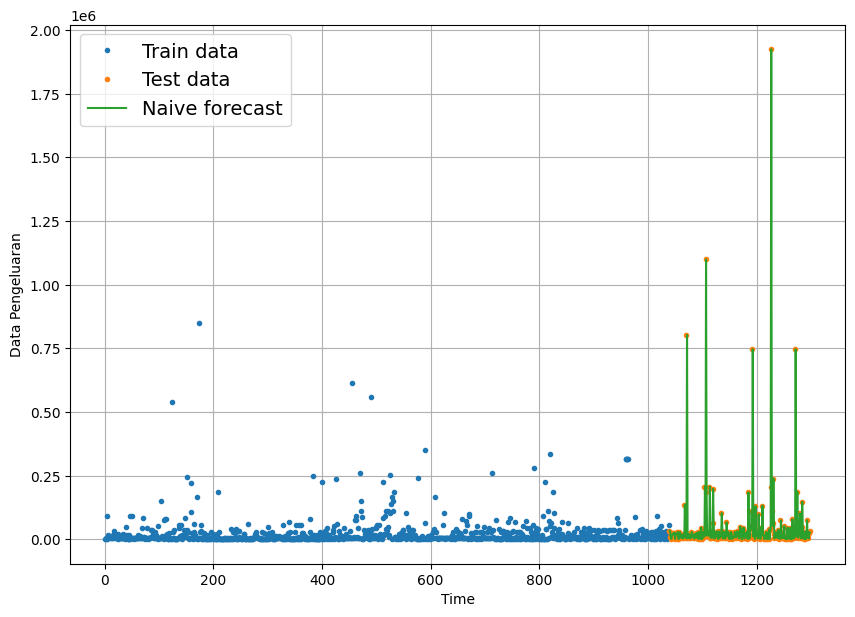

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

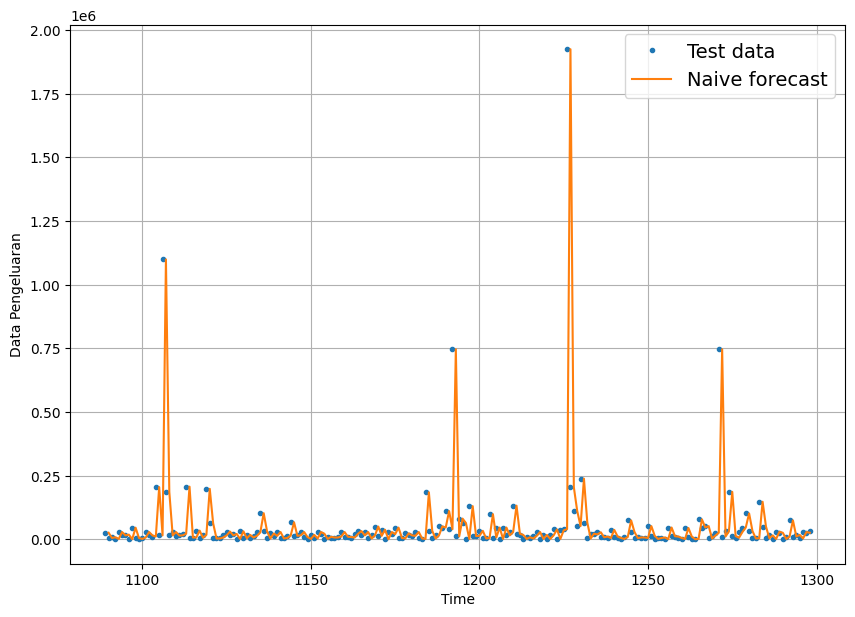

In [ ]:
plt.figure(figsize=(10, 7))
offset = 50
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 68505.695,
 'mse': 48481006000.0,
 'rmse': 220184.02,
 'mape': 409.79425,
 'mase': 0.9964324}

In [ ]:
# Find average price of item in dataset
tf.reduce_mean(y_test).numpy()

47727

### Windowing dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(series, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1291, 1291)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [ 1866  6533  1866  1866 93330 18666 11199] -> Label: [5599]
Window: [ 6533  1866  1866 93330 18666 11199  5599] -> Label: [8959]
Window: [ 1866  1866 93330 18666 11199  5599  8959] -> Label: [9333]


In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [26132  1866 11199 74664 11199 17732  3733] -> Label: [28932]
Window: [ 1866 11199 74664 11199 17732  3733 28932] -> Label: [26132]
Window: [11199 74664 11199 17732  3733 28932 26132] -> Label: [31732]


### Turning windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) #to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1032, 259, 1032, 259)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[ 1866,  6533,  1866,  1866, 93330, 18666, 11199],
        [ 6533,  1866,  1866, 93330, 18666, 11199,  5599],
        [ 1866,  1866, 93330, 18666, 11199,  5599,  8959],
        [ 1866, 93330, 18666, 11199,  5599,  8959,  9333],
        [93330, 18666, 11199,  5599,  8959,  9333,  3733]]),
 array([[ 5599],
        [ 8959],
        [ 9333],
        [ 3733],
        [14932]]))

### Make a modelling checkpoint

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
def create_modelFix_checkpoint(model_name):
  return tf.keras.callbacks.ModelCheckpoint(f'{model_name.name}.h5',
                                            verbose=0,
                                            save_best_only=True)

### Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")


model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
9/9 [==============================] - 8s 88ms/step - loss: 22582.0938 - mae: 22582.0938 - val_loss: 44075.6875 - val_mae: 44075.6875
Epoch 2/100
9/9 [==============================] - 0s 53ms/step - loss: 21475.5605 - mae: 21475.5605 - val_loss: 43028.3164 - val_mae: 43028.3164
Epoch 3/100
9/9 [==============================] - 0s 53ms/step - loss: 21111.2598 - mae: 21111.2598 - val_loss: 42530.3086 - val_mae: 42530.3086
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 21037.1074 - mae: 21037.1074 - val_loss: 42584.2539 - val_mae: 42584.2539
Epoch 5/100
9/9 [==============================] - 0s 52ms/step - loss: 20794.5742 - mae: 20794.5742 - val_loss: 42489.5742 - val_mae: 42489.5742
Epoch 6/100
9/9 [==============================] - 0s 54ms/step - loss: 20662.1816 - mae: 20662.1816 - val_loss: 42308.1719 - val_mae: 42308.1719
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 20564.8750 - mae: 20564.8750 - val_loss: 42450.2539 - 

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 3ms/step - loss: 42683.6953 - mae: 42683.6953


[42683.6953125, 42683.6953125]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 3ms/step - loss: 42176.3477 - mae: 42176.3477


[42176.34765625, 42176.34765625]

In [ ]:
from tensorflow import keras

In [ ]:
model_h5_1dense = keras.models.load_model('/content/model_1_dense.h5')

In [ ]:
model_h5_1dense.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 4ms/step - loss: 42365.8633 - mae: 42365.8633


[42365.86328125, 42365.86328125]

### Making forecasts with a model (on the test dataset)

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

9/9 [==============================] - 0s 2ms/step


(259,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([17209.926 , 14336.229 ,  5934.9634,  4807.735 ,  5383.112 ,
         7629.1777,  8411.273 , 10123.9795,  8278.941 ,  9864.489 ],
       dtype=float32)>)

### Test using variabel

In [ ]:
X = np.array([[150000, 700000, 450000, 250000, 350000, 600000, 500000]])

In [ ]:
X_float = X.astype(np.float32)

In [ ]:
X_float

array([[150000., 700000., 450000., 250000., 350000., 600000., 500000.]],
      dtype=float32)

In [ ]:
X

array([[150000, 120000,  50000,  45000, 200000, 150000,  70000]])

In [ ]:
result = model_1.predict(X_float)

1/1 [==============================] - 0s 22ms/step


In [ ]:
result

array([[255745.38]], dtype=float32)

### Evaluate

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 42176.348,
 'mse': 26965370000.0,
 'rmse': 164211.36,
 'mape': 145.22063,
 'mase': 0.6134655}

In [ ]:
naive_results

{'mae': 68505.695,
 'mse': 48481006000.0,
 'rmse': 220184.02,
 'mape': 409.79425,
 'mase': 0.9964324}

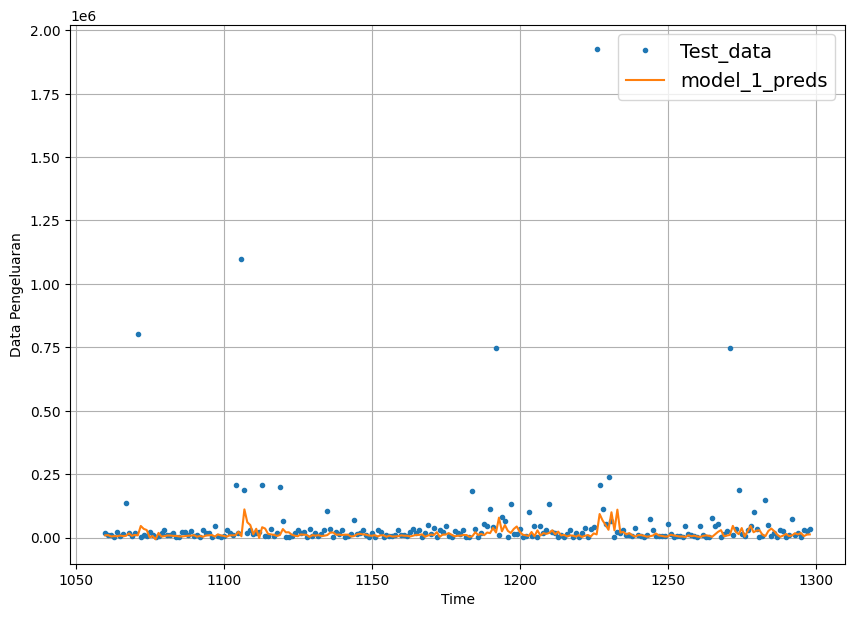

In [ ]:
offset = 20
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(series, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1268, 1268)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1014, 254, 1014, 254)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

8/8 [==============================] - 0s 3ms/step - loss: 52128.1836


52128.18359375

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

8/8 [==============================] - 0s 3ms/step - loss: 47901.5664


47901.56640625

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

8/8 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 47901.566,
 'mse': 28159200000.0,
 'rmse': 167807.03,
 'mape': 253.17049,
 'mase': 0.68500364}

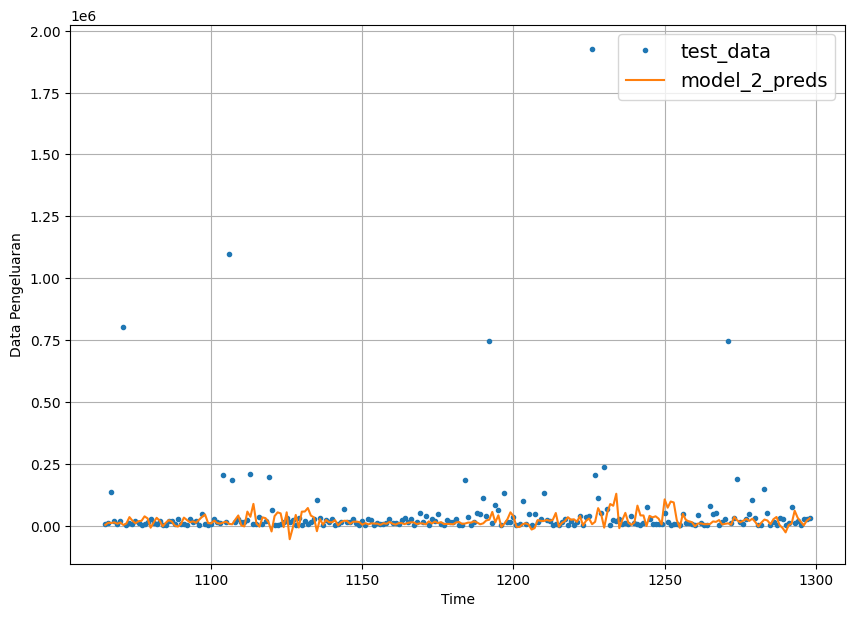

In [ ]:
offset = 20
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

### Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(series, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1262, 1262)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1009, 253, 1009, 253)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

8/8 [==============================] - 0s 3ms/step - loss: 47305.2773


47305.27734375

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

8/8 [==============================] - 0s 3ms/step - loss: 46710.6523


46710.65234375

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

8/8 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[11432.772  ,  7857.1924 , 10011.457  ,  6690.168  , 11699.935  ,
         4430.892  ,  7819.788  ],
       [12841.018  , 10894.355  , 20037.055  , 14341.795  ,  4068.8682 ,
         4625.15   , 10189.461  ],
       [  -41.08868, 10055.033  , 12983.012  ,  6959.7334 ,  8578.059  ,
         4299.872  ,  7546.0874 ],
       [ 7196.4883 ,  5594.371  ,  5111.509  ,  9724.988  ,  6688.8926 ,
         9026.863  ,  6676.243  ],
       [13477.622  ,  6985.4336 , 10289.335  ,  6729.468  ,  7664.8037 ,
        11247.994  ,  8152.6494 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 10429.672 ,  10306.308 ,  10801.614 ,  12227.591 ,  12791.669 ,
         13429.206 ,  13862.346 ,  10026.616 ,  12771.078 ,   9684.705 ,
         12682.312 ,   9507.542 ,   9588.158 ,  10053.846 ,   9950.9795,
          7777.0483,   6657.779 ,   7815.857 ,   8441.815 ,   4825.3555,
          5927.8975,  22370.52  ,  23698.125 ,  23044.701 ,  25782.223 ,
        135536.98  , 136240.22  , 136022.95  , 117181.31  , 117724.    ,
        118213.836 , 117331.984 ,  11860.514 ,  11475.858 ,  13998.772 ,
         13894.782 ,  15374.884 ,   9910.737 ,  12423.067 ,   8989.952 ,
          9496.0205,   4448.611 ,  12672.13  ,  10703.616 ,  11230.226 ,
          6843.1494,  12214.124 ,  11638.38  ,  11670.998 ,  13278.585 ,
          9885.948 ,  10727.536 ,  13952.516 ,  11368.869 ,  17092.498 ,
         17059.316 ,  13816.813 ,  15100.1045,  37891.055 ,  38130.55  ,
        182076.42  , 204067.42  , 214925.48  , 215850.89  , 217617.12  ,
        185355.02  , 189758.89  ,  61623.848

### Make our evaluation function work for larger horizons

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 46710.652,
 'mse': 27690551000.0,
 'rmse': 84770.75,
 'mape': 240.5188,
 'mase': 0.666262}

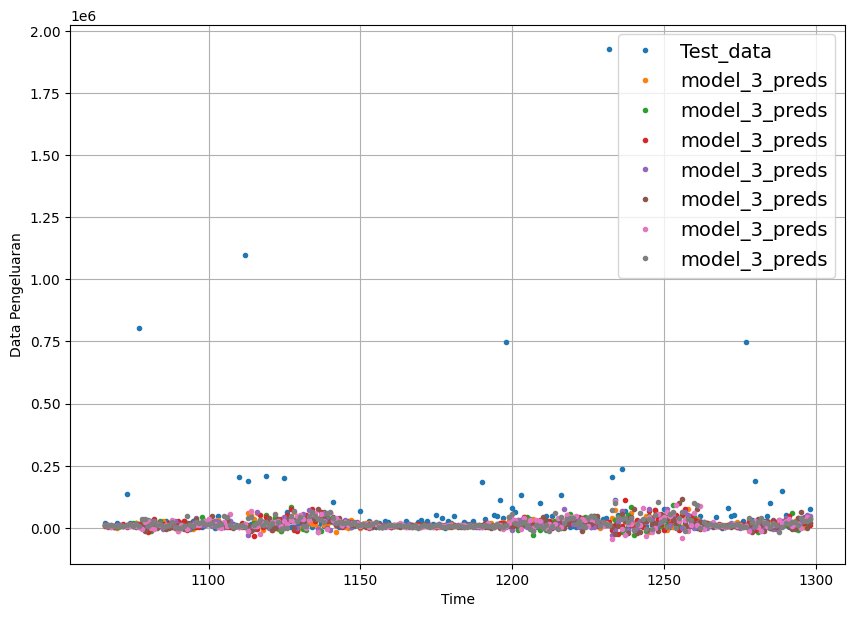

In [ ]:
offset = 20
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

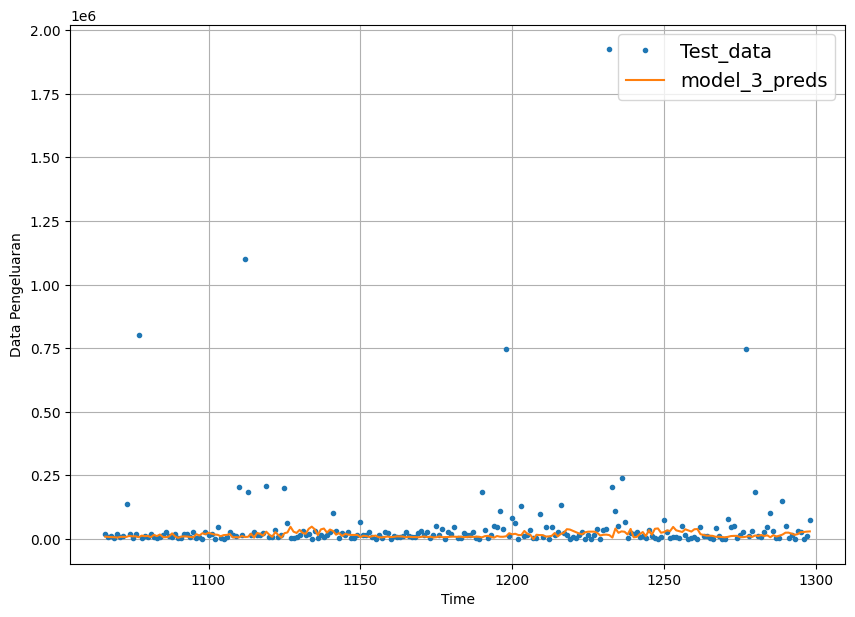

In [ ]:
offset = 20
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

### Best model from same with naive model

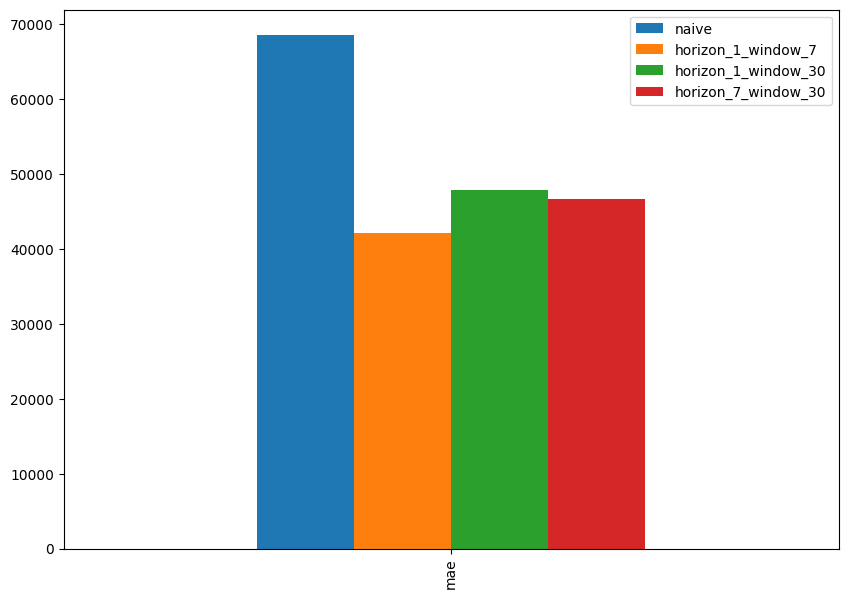

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(series, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1291, 1291)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1032, 259, 1032, 259)

In [ ]:
# Check data sample shapes
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[ 1866]
 [ 6533]
 [ 1866]
 [ 1866]
 [93330]
 [18666]
 [11199]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

TypeError: ignored

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 3ms/step - loss: 41900.2148


41900.21484375

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

9/9 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15785.329 , 12888.376 ,  7870.7036,  6684.228 ,  3857.6714,
        5331.3325,  8664.52  ,  9911.671 ,  8035.557 ,  9533.853 ],
      dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 41900.215,
 'mse': 26846329000.0,
 'rmse': 163848.48,
 'mape': 144.30182,
 'mase': 0.60944945}

### Model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

8/8 [==============================] - 0s 4ms/step - loss: 45387.7422


45387.7421875

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

8/8 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[15320.986 , 13309.621 ,  7383.419 , 12265.545 , 12401.706 ,
        14844.281 , 12826.557 ],
       [ 6005.2114,  5107.725 ,  9249.022 , 10242.439 ,  6125.756 ,
         3991.4397,  6073.9023],
       [ 4058.2937,  7338.365 ,  9170.443 ,  6535.1074, 11474.588 ,
         6105.2715,  6330.5215],
       [13231.141 , 13808.894 ,  9354.871 , 12431.881 , 13147.925 ,
        13262.913 ,  7653.4805],
       [ 6739.453 ,  5950.125 ,  7743.8223,  4037.9067,  6216.0225,
         6159.7646,  8844.193 ],
       [ 8577.415 ,  5310.8696,  9584.618 ,  8615.884 ,  7450.112 ,
         4912.7373,  5459.677 ],
       [ 7674.504 ,  8413.772 ,  7680.382 ,  6134.0034,  8265.532 ,
         6401.9775,  7278.479 ],
       [ 8782.253 ,  8862.412 ,  8046.968 ,  6264.6567,  7006.1973,
         9916.072 ,  9850.482 ],
       [ 9019.267 ,  7064.8706,  6831.5845,  6630.173 ,  7375.8945,
         7890.754 ,  8416.787 ],
       [ 9488.013 ,  8747.1455,  3419.9727

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 45387.742,
 'mse': 27900522000.0,
 'rmse': 83737.78,
 'mape': 188.79384,
 'mase': 0.6473926}

### Model 6: N-BEATS algorithm

https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]],
      dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 6.1505957   3.53652     1.1499858   0.2942608   0.50563574  2.252095
  4.4594116  -2.7181146  -3.3922615  -1.8807309   2.815826   -3.1072829
 -1.0756645   1.9928558  -3.1680403  -2.4783192  -2.0127547  -2.4737437
 -2.7497678  -1.3540683  -2.1219394   3.3446674   3.205233   -0.807418
 -2.6657953   1.7549683   1.4384263   3.0334466  -4.65691    -0.09880081]
Forecast: [ 0.11002886  5.377911   -2.6432986  -0.26938283  0.8840356   1.3903024
  2.1066089 ]


### Preparing data for the N-BEATS algorithm using tf.data

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
combined_array = np.column_stack((times_step, series))

In [ ]:
df = pd.DataFrame(combined_array, columns=['Times_step', 'Outcomes'])

In [ ]:
df.head()

,Times_step,Outcomes
0,1,1866
1,2,6533
2,3,1866
3,4,1866
4,5,93330


In [ ]:
data = df.set_index('Times_step')
data.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298],
           dtype='int64', name='Times_step', length=1298)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 1 to 1298
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Outcomes  1298 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


In [ ]:
data.isnull().sum()

Outcomes    0
dtype: int64

In [ ]:
data

,Outcomes
Times_step,
1,1866
2,6533
3,1866
4,1866
5,93330
...,...
1294,17732
1295,3733
1296,28932


In [ ]:
# Add windowed columns
outcomes_nbeats = data.copy()
for i in range(WINDOW_SIZE):
  outcomes_nbeats[f"Outomes+{i+1}"] = outcomes_nbeats["Outcomes"].shift(periods=i+1)
outcomes_nbeats.dropna().head()

,Outcomes,Outomes+1,Outomes+2,Outomes+3,Outomes+4,Outomes+5,Outomes+6,Outomes+7
Times_step,,,,,,,,
8,5599,11199.0,18666.0,93330.0,1866.0,1866.0,6533.0,1866.0
9,8959,5599.0,11199.0,18666.0,93330.0,1866.0,1866.0,6533.0
10,9333,8959.0,5599.0,11199.0,18666.0,93330.0,1866.0,1866.0
11,3733,9333.0,8959.0,5599.0,11199.0,18666.0,93330.0,1866.0
12,14932,3733.0,9333.0,8959.0,5599.0,11199.0,18666.0,93330.0


In [ ]:
# Make features and labels
X = outcomes_nbeats.dropna().drop("Outcomes", axis=1)
y = outcomes_nbeats.dropna()["Outcomes"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1032, 1032, 259, 259)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):

  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_6 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_6_N-BEATS")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_6.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1), create_model_checkpoint(model_6.name)])



Epoch 169: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 269: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 5min 17s, sys: 7.08 s, total: 5min 24s
Wall time: 6min 8s


In [ ]:
model_6.save('model_n-beats.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load in best version of model 6 and evaluate on the test data
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_N-BEATS/")
model_6.evaluate(test_dataset)

1/1 [==============================] - 1s 993ms/step - loss: 42704.9688 - mae: 42704.9688 - mse: 26841610240.0000


[42704.96875, 42704.96875, 26841610240.0]

In [ ]:
# Evaluate N-BEATS model on the test dataset
model_6.evaluate(test_dataset)

1/1 [==============================] - 0s 34ms/step - loss: 42704.9688 - mae: 42704.9688 - mse: 26841610240.0000


[42704.96875, 42704.96875, 26841610240.0]

In [ ]:
# Make predictions with N-BEATS model
model_6_preds = make_preds(model_6, test_dataset)
model_6_preds[:10]

1/1 [==============================] - 1s 841ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9485.438 ,  7416.726 ,  4371.879 ,  4623.837 ,  6441.3315,
       12881.402 , 10749.221 ,  6689.3975,  2221.2004, 10803.175 ],
      dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 42704.97,
 'mse': 26841610000.0,
 'rmse': 163834.1,
 'mape': 164.09479,
 'mase': 0.6211544}

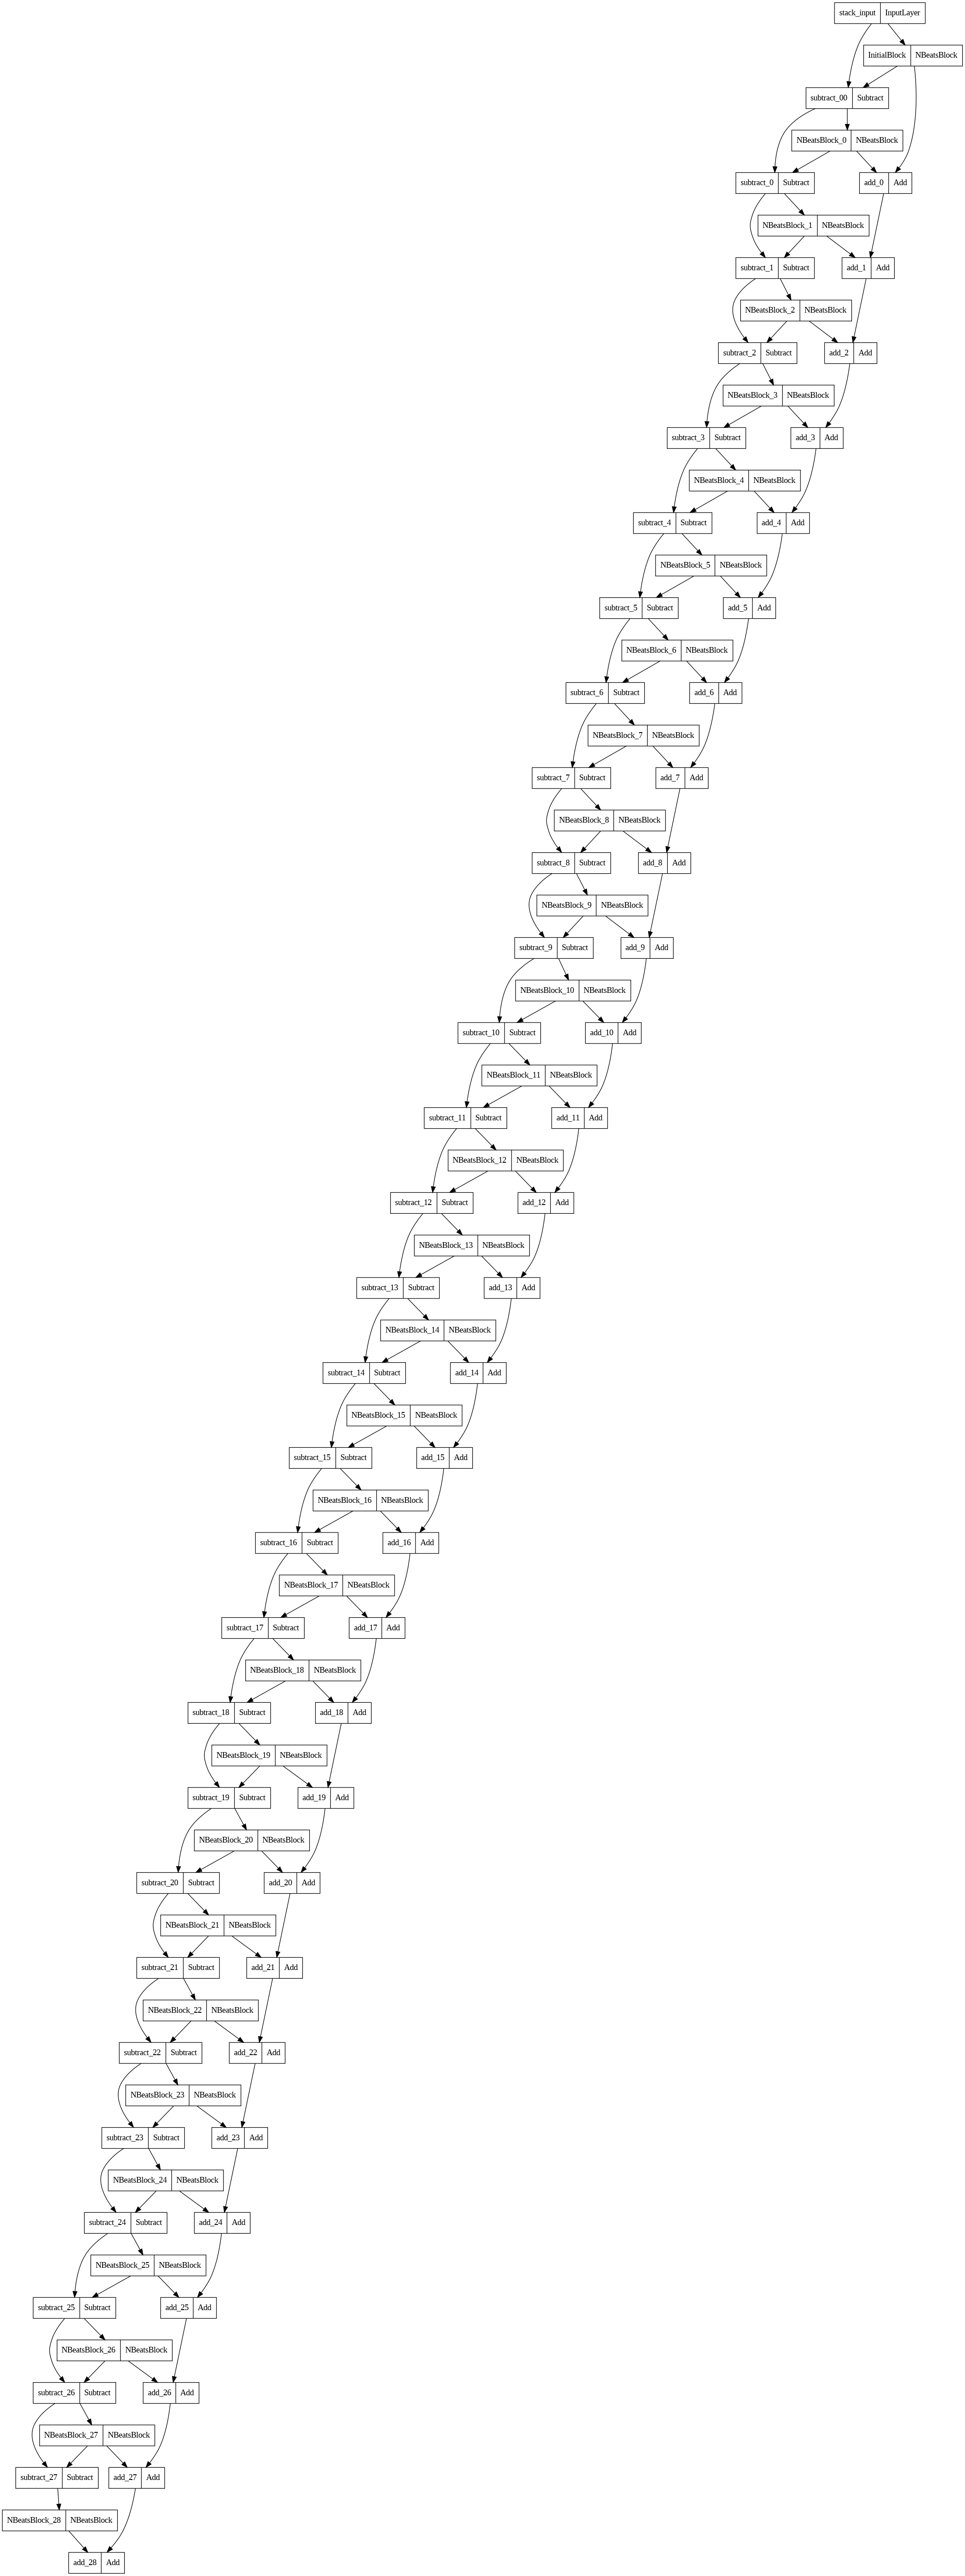

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_6)

### CNN + LSTM

In [ ]:
tf.random.set_seed(42)

inputs_model = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x_model = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs_model)
x_model = tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu")(x_model)
x_model = tf.keras.layers.LSTM(32, activation="relu", return_sequences=True)(x_model)
x_model = tf.keras.layers.LSTM(32, activation="relu")(x_model)
x_model = tf.keras.layers.Dense(128, activation="relu")(x_model)
x_model = tf.keras.layers.Dense(128, activation="relu")(x_model)
output_model = layers.Dense(HORIZON)(x_model)
model_8 = tf.keras.Model(inputs=inputs_model, outputs=output_model, name="model_cnn_lstm")

In [ ]:
model_8.compile(loss=tf.keras.losses.Huber(),
                optimizer=tf.keras.optimizers.Adam())


model_8.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_modelFix_checkpoint(model_8)])

Epoch 1/100
9/9 [==============================] - 7s 72ms/step - loss: 20714.9355 - val_loss: 43213.5234
Epoch 2/100
6/9 [===================>..........] - ETA: 0s - loss: 21333.6797

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 22ms/step - loss: 20769.3887 - val_loss: 43195.7109
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 20547.8145 - val_loss: 43808.7617
Epoch 4/100
9/9 [==============================] - 0s 18ms/step - loss: 20913.2148 - val_loss: 43232.7266
Epoch 5/100
9/9 [==============================] - 0s 24ms/step - loss: 20677.0840 - val_loss: 42788.5508
Epoch 6/100
9/9 [==============================] - 0s 18ms/step - loss: 20734.4062 - val_loss: 43111.6445
Epoch 7/100
9/9 [==============================] - 0s 23ms/step - loss: 20743.3281 - val_loss: 42691.6484
Epoch 8/100
9/9 [==============================] - 0s 18ms/step - loss: 20472.5781 - val_loss: 42921.0234
Epoch 9/100
9/9 [==============================] - 0s 23ms/step - loss: 20485.5176 - val_loss: 42402.5273
Epoch 10/100
9/9 [==============================] - 0s 18ms/step - loss: 20529.4727 - val_loss: 42984.5430
Epoch 11/100
9/9 [==============================] - 0s 20

In [ ]:
model8_cnn_lstm = tf.keras.models.load_model("model_experiments/model_cnn_lstm/")
model8_cnn_lstm.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 4ms/step - loss: 42160.8789


42160.87890625

In [ ]:
model_8_preds = make_preds(model8_cnn_lstm, test_windows)
model_8_preds[:10]

9/9 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 4400.4526, 14123.571 , 10985.523 ,  8960.669 ,  7682.793 ,
        9872.748 , 11219.645 ,  6892.3696,  7974.466 , 12018.9375],
      dtype=float32)>

In [ ]:
model_8_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_8_preds)
model_8_results

{'mae': 42161.387,
 'mse': 26949181000.0,
 'rmse': 164162.06,
 'mape': 143.95714,
 'mase': 0.6132479}

### Model esemble learning LSTM

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape", tf.keras.losses.Huber()]):
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                               strides=1,
                               padding="causal",
                               activation="relu",
                               input_shape=[None, 1]),
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(32, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(32, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(HORIZON)
      ], name="model_esemble-lstm")

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1),
                           create_model_checkpoint(model.name)])

      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models()

Optimizing model by reducing: mae for 100 epochs, model number: 0
Optimizing model by reducing: mse for 100 epochs, model number: 0
Optimizing model by reducing: mape for 100 epochs, model number: 0
Optimizing model by reducing: <keras.src.losses.Huber object at 0x7f9be814b8b0> for 100 epochs, model number: 0
Optimizing model by reducing: mae for 100 epochs, model number: 1


KeyboardInterrupt: ignored

### Prediction with esemble

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

### Plotting the prediction intervals

Function upper and lower value interval

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

# Compare Model

In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              # "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_NBEATS": model_6_results,
                              # "model_esemble_lstm": ensemble_results,
                              "model_8_cnn_lstm": model_8_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,68505.695312,4.848101e+10,220184.015625,409.794250,0.996432
model_1_dense_w7_h1,42176.347656,2.696537e+10,164211.359375,145.220627,0.613465
model_2_dense_w30_h1,47901.566406,2.815920e+10,167807.031250,253.170486,0.685004
model_3_dense_w30_h7,46710.652344,2.769055e+10,84770.750000,240.518799,0.666262
model_5_LSTM,45387.742188,2.790052e+10,83737.781250,188.793839,0.647393
model_6_NBEATS,42704.968750,2.684161e+10,163834.093750,164.094788,0.621154
model_8_cnn_lstm,42161.386719,2.694918e+10,164162.062500,143.957138,0.613248


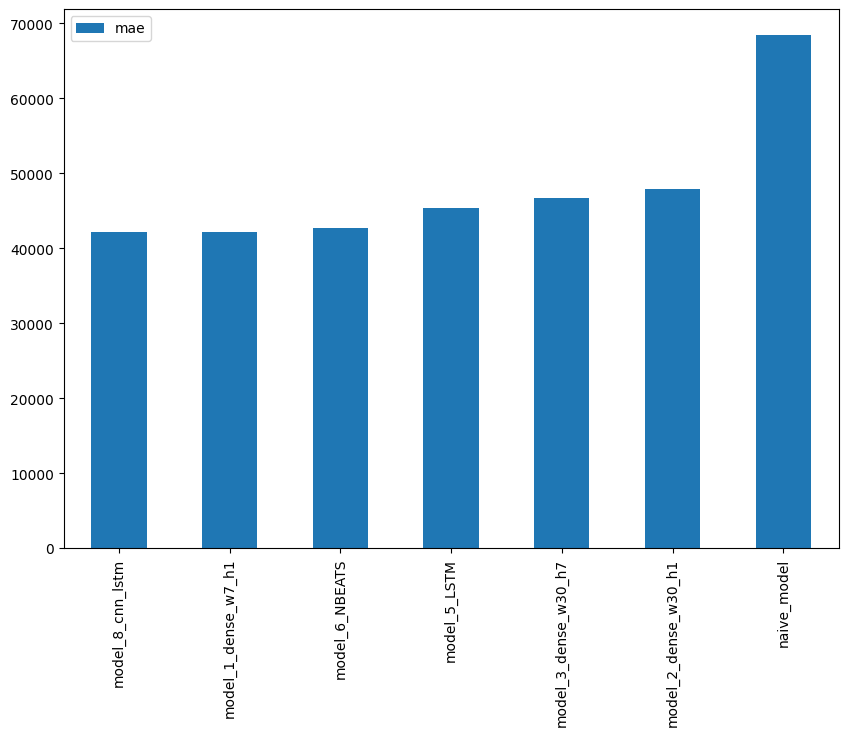

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

In [ ]:
!zip -r model_lstm.zip /content/model_experiments/model_5_lstm

  adding: content/model_experiments/model_5_lstm/ (stored 0%)
  adding: content/model_experiments/model_5_lstm/saved_model.pb (deflated 89%)
  adding: content/model_experiments/model_5_lstm/variables/ (stored 0%)
  adding: content/model_experiments/model_5_lstm/variables/variables.index (deflated 57%)
  adding: content/model_experiments/model_5_lstm/variables/variables.data-00000-of-00001 (deflated 67%)
  adding: content/model_experiments/model_5_lstm/assets/ (stored 0%)
  adding: content/model_experiments/model_5_lstm/keras_metadata.pb (deflated 86%)
  adding: content/model_experiments/model_5_lstm/fingerprint.pb (stored 0%)


In [ ]:
!zip -r model_1_Dense.zip /content/model_experiments/model_1_dense

  adding: content/model_experiments/model_1_dense/ (stored 0%)
  adding: content/model_experiments/model_1_dense/saved_model.pb (deflated 85%)
  adding: content/model_experiments/model_1_dense/variables/ (stored 0%)
  adding: content/model_experiments/model_1_dense/variables/variables.index (deflated 57%)
  adding: content/model_experiments/model_1_dense/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/model_experiments/model_1_dense/assets/ (stored 0%)
  adding: content/model_experiments/model_1_dense/keras_metadata.pb (deflated 83%)
  adding: content/model_experiments/model_1_dense/fingerprint.pb (stored 0%)


In [ ]:
!zip -r model_cnn_lstm.zip /content/model_experiments/model_cnn_lstm

  adding: content/model_experiments/model_cnn_lstm/ (stored 0%)
  adding: content/model_experiments/model_cnn_lstm/keras_metadata.pb (deflated 90%)
  adding: content/model_experiments/model_cnn_lstm/assets/ (stored 0%)
  adding: content/model_experiments/model_cnn_lstm/variables/ (stored 0%)
  adding: content/model_experiments/model_cnn_lstm/variables/variables.data-00000-of-00001 (deflated 29%)
  adding: content/model_experiments/model_cnn_lstm/variables/variables.index (deflated 67%)
  adding: content/model_experiments/model_cnn_lstm/fingerprint.pb (stored 0%)
  adding: content/model_experiments/model_cnn_lstm/saved_model.pb (deflated 90%)
